In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import plotly.express as px
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df = pd.read_csv('../../knnData/BA_US_knn_text.csv')

(6331638, 17)
(1829363, 10)
   abv  appearance  taste    rating  style_Altbier  \
0 -0.5         0.0  -0.50 -0.313433            0.0   
1 -0.5        -1.0  -0.75 -1.014925            0.0   
2 -0.5        -2.0  -0.50 -0.955224            0.0   
3 -0.5         0.0   0.00  0.134328            0.0   
4 -0.5         0.0   0.50  0.731343            0.0   

   style_American Adjunct Lager  style_American Amber / Red Ale  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   style_American Amber / Red Lager  style_American Barleywine  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0           

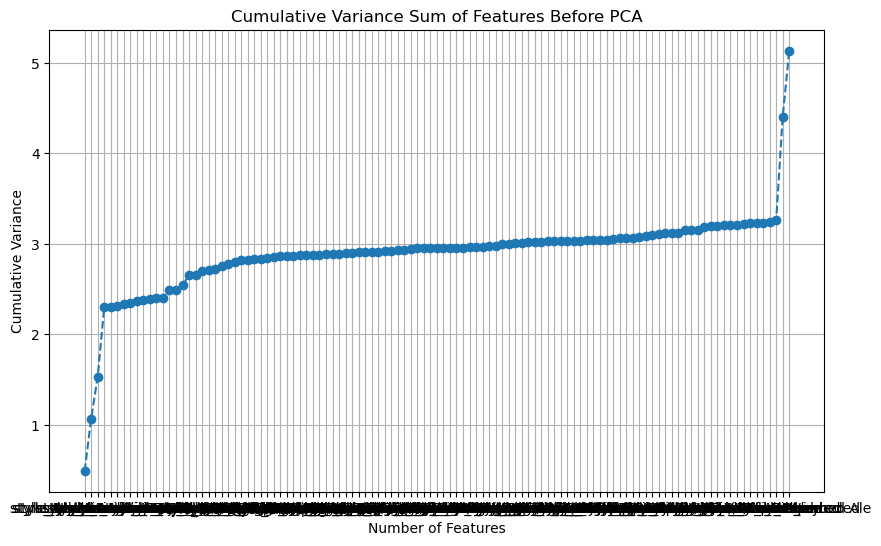

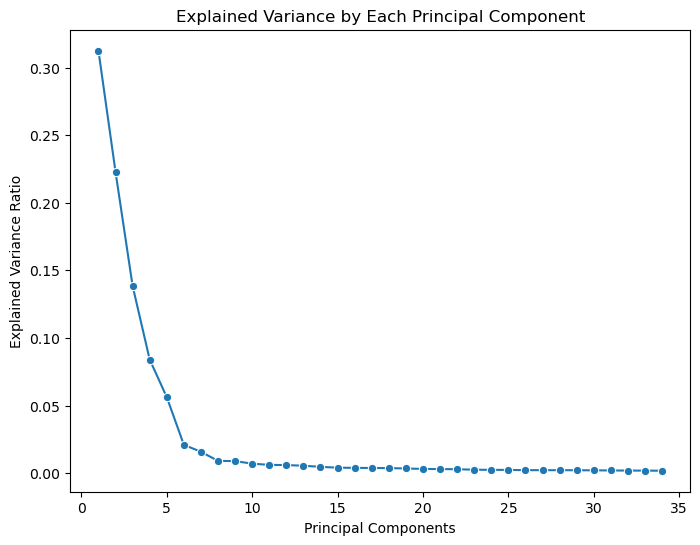

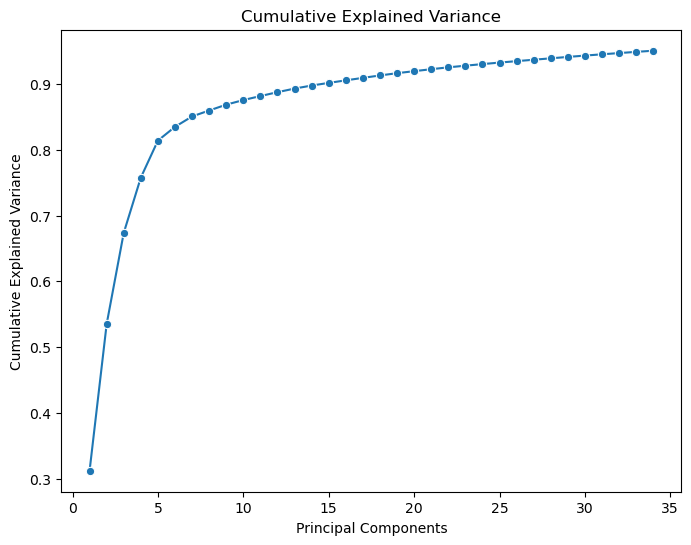

PCA transformed data saved as 'pca_transformed_data.csv'
Shape of the DataFrame: (1829363, 34)


In [77]:
%run param_selec.ipynb

### Finding the optimal parameters for the clustering

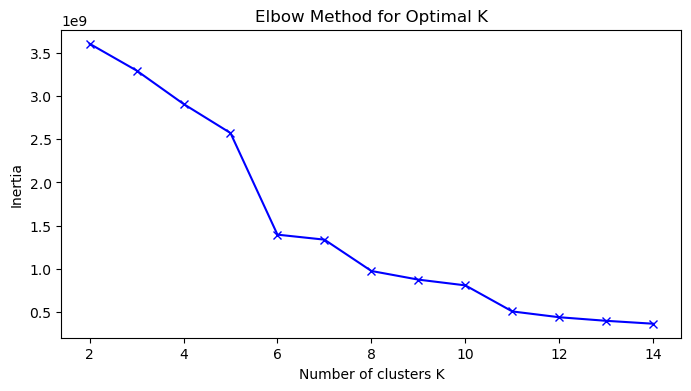

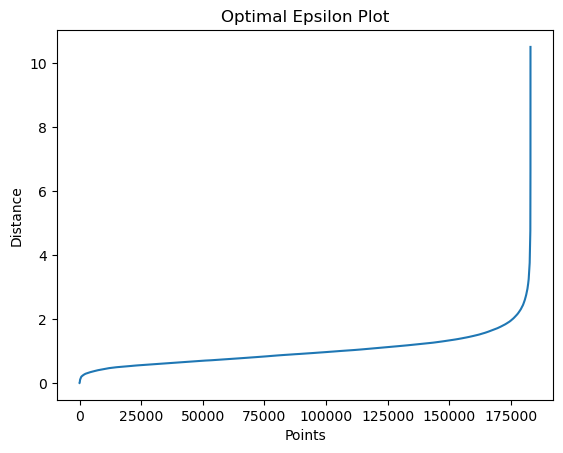

In [33]:
#======================================
#IMPUTATION
#======================================

'''
iter_imputer = IterativeImputer(random_state=42)
X_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(X), columns=X.columns)

print(X_iter_imputed.isnull().sum())
'''
#======================================
#SCALING
#======================================

#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MinMaxScaler()
#you use this one if the iterative imputer is running
#X_scaled = pd.DataFrame(scaler.fit_transform(X_iter_imputed), columns=X_iter_imputed.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X_pca_df), columns=X_pca_df.columns)

#======================================
#IMPROVEMENTS ON CLUSTERING
#======================================

#KMEANS
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#DBSCAN
X_subset = X_scaled.sample(frac=0.1, random_state=42)  # Use 10% of the data

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_subset)
distances, indices = neighbors_fit.kneighbors(X_subset)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("Optimal Epsilon Plot")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

### Clustering (Kmeans and DBSCAN)

In [37]:

#======================================
#K MEANS CLUSTERING
#======================================
optimal_k = 6
#kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_scaled.columns = X_scaled.columns.astype(str)
kmeans = KMeans(n_clusters=optimal_k, n_init=50, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)
X_scaled['cluster_Kmeans'] = cluster_labels_kmeans

#======================================
#DBSCAN
#======================================
X_scaled.columns = X_scaled.columns.astype(str)
dbscan = DBSCAN(eps=1.0, min_samples=5, n_jobs=-1)
cluster_labels_DBSCAN = dbscan.fit_predict(X_scaled)
X_scaled['cluster_DBSCAN'] = cluster_labels_DBSCAN

#======================================
#AGGLOMERATIVE CLUSTERING
#======================================
'''
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = agglo.fit_predict(X_scaled)
X_scaled['cluster'] = cluster_labels
'''


"\nagglo = AgglomerativeClustering(n_clusters=5, linkage='ward')\ncluster_labels = agglo.fit_predict(X_scaled)\nX_scaled['cluster'] = cluster_labels\n"

### Visualising the clusters and the state distribution in each cluster

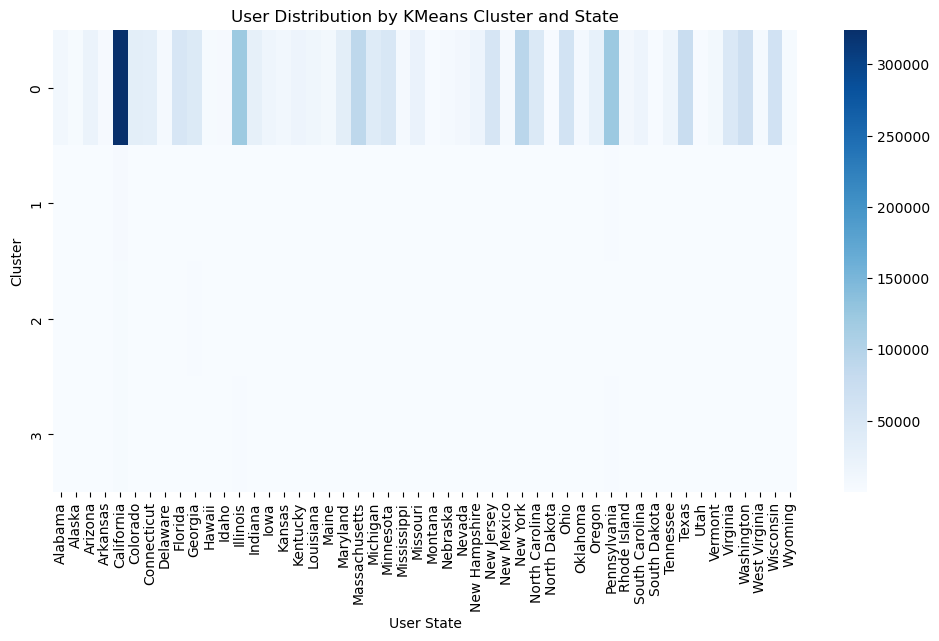

Cluster 0: Nebraska, North Dakota, South Dakota, Minnesota, Wisconsin, Iowa, Wyoming, West Virginia, New Hampshire, Michigan
Cluster 1: Utah, Delaware, Maine, Pennsylvania, Virginia, Hawaii, Arizona, North Carolina, Idaho, New York
Cluster 2: Arkansas, Georgia, Utah, Oklahoma, Mississippi, South Carolina, Oregon, Wyoming, Vermont, Tennessee
Cluster 3: Louisiana, Idaho, Georgia, Washington, Oregon, Utah, Hawaii, Wisconsin, Mississippi, Colorado


/var/folders/qf/dk7tzwpd1_j2430sljmhw_c40000gq/T/ipykernel_72909/2264714602.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_df, x='cluster_state', y='percentage', palette="viridis")


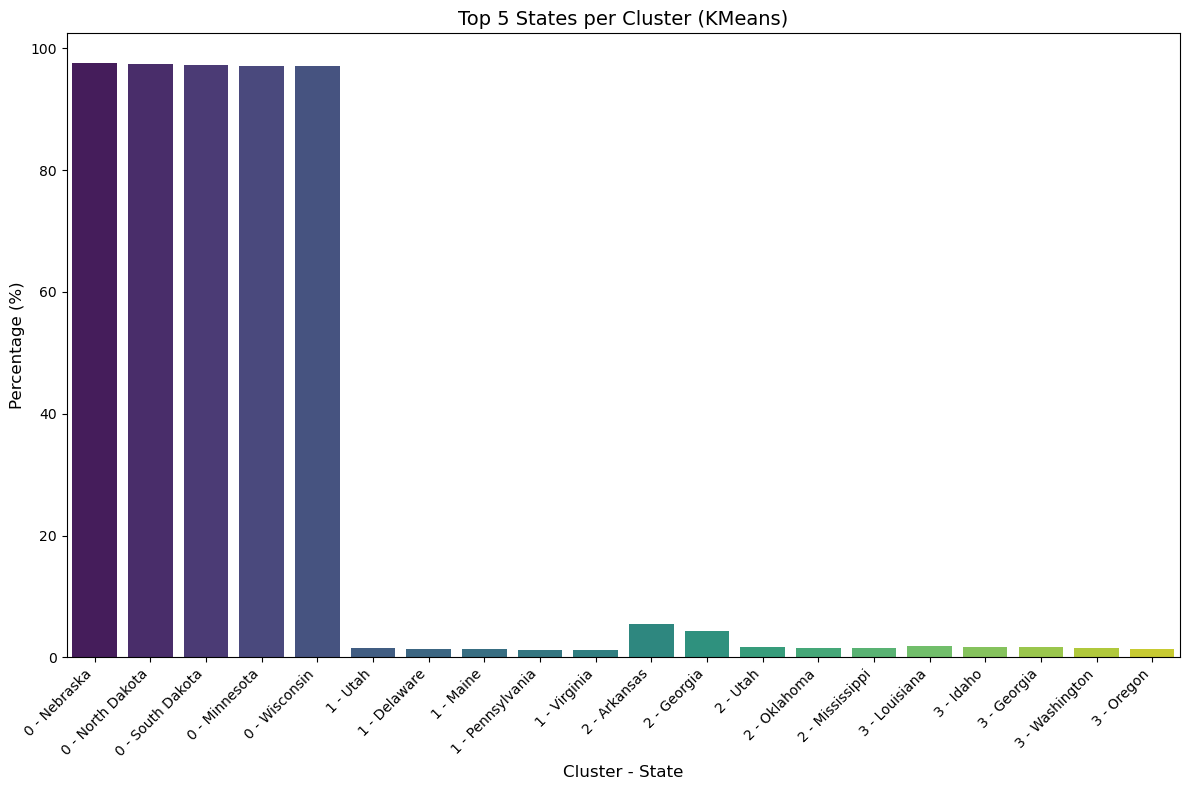

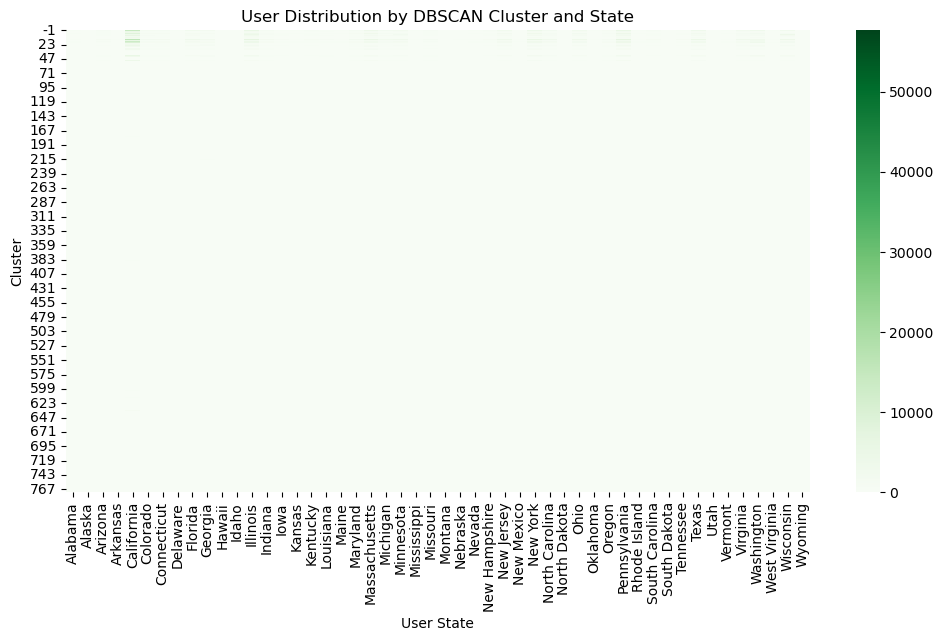

Cluster -1: Delaware, Montana, Oklahoma, South Dakota, Washington, Michigan, Rhode Island, Wyoming, Arizona, California
Cluster 0: New Mexico, Massachusetts, Washington, Montana, New Hampshire, Rhode Island, Alaska, New Jersey, Oregon, California
Cluster 1: Wyoming, Alaska, Louisiana, Oregon, Utah, Colorado, Montana, Vermont, Arizona, Kentucky
Cluster 2: Wisconsin, Illinois, Iowa, Vermont, Wyoming, Minnesota, Montana, Utah, South Dakota, Rhode Island
Cluster 3: Utah, Delaware, Maine, Virginia, Pennsylvania, Idaho, Arizona, Hawaii, North Carolina, New York
Cluster 4: Maine, Hawaii, Utah, Alaska, Massachusetts, Idaho, Connecticut, Rhode Island, Delaware, New Hampshire
Cluster 5: Wisconsin, Minnesota, New Hampshire, West Virginia, Montana, Illinois, Connecticut, Rhode Island, South Dakota, Iowa
Cluster 6: Wisconsin, Minnesota, Illinois, Iowa, Indiana, Alaska, South Dakota, Missouri, Montana, Colorado
Cluster 7: Minnesota, North Dakota, South Dakota, Iowa, Tennessee, Nebraska, Missouri, Lo

/var/folders/qf/dk7tzwpd1_j2430sljmhw_c40000gq/T/ipykernel_72909/2264714602.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_df, x='cluster_state', y='percentage', palette="viridis")


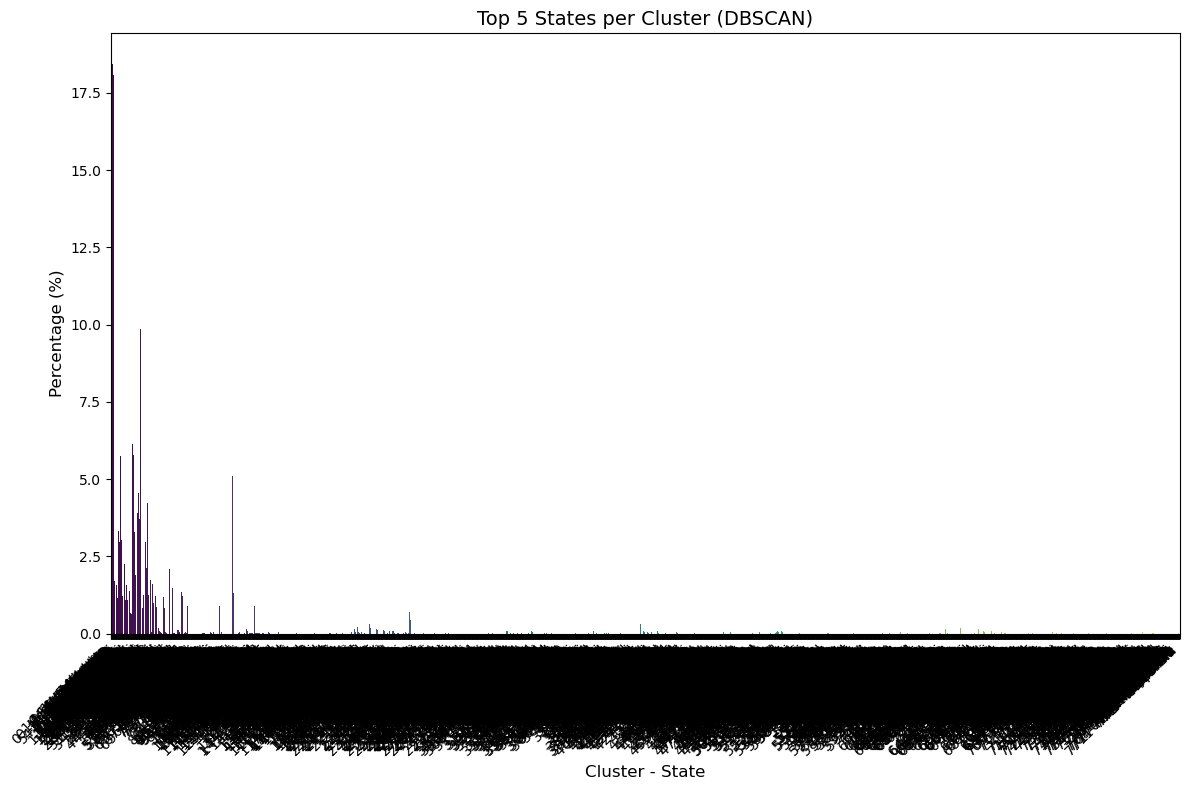

In [39]:
cluster_labels_df = X_scaled[['cluster_Kmeans', 'cluster_DBSCAN']].reset_index(drop=True)
cluster_labels_df['user_id'] = df.loc[X_pca_df.index, 'user_id'].values
cluster_labels_df['beer_id'] = df.loc[X_pca_df.index, 'beer_id'].values

cluster_labels_df = cluster_labels_df.merge(df[['user_id', 'user_state']].drop_duplicates(), on='user_id', how='left')
if 'beer_id' in df.columns:
    cluster_labels_df = cluster_labels_df.merge(df[['beer_id', 'beer_state']].drop_duplicates(), on='beer_id', how='left')

#======================================
# PLOTS: HEATMAP AND BAR PLOTS FOR BOTH CLUSTERS
#======================================
def plot_heatmap(cluster_column, title, cmap):
    user_cluster_state_counts = cluster_labels_df.groupby([cluster_column, 'user_state']).size().unstack(fill_value=0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(user_cluster_state_counts, annot=False, fmt='d', cmap=cmap)
    plt.title(title)
    plt.xlabel('User State')
    plt.ylabel('Cluster')
    plt.show()

def plot_bar_top_states(cluster_column, cluster_method):
    user_cluster_state_counts_t = cluster_labels_df.groupby([cluster_column, 'user_state']).size().unstack(fill_value=0).T
    state_totals = user_cluster_state_counts_t.sum(axis=1)
    normalized_cluster_data = user_cluster_state_counts_t.div(state_totals, axis=0)

    top_5_data = []
    for cluster_label, cluster_data in normalized_cluster_data.items():
        top_states = cluster_data.nlargest(5).index
        top_values = cluster_data.nlargest(5).values
        top_5_data.append(pd.DataFrame({
            'state': top_states,
            'percentage': top_values * 100,
            'cluster': cluster_label
        }))
        top_states = cluster_data.nlargest(10).index
        print(f"Cluster {cluster_label}: {', '.join(top_states)}")
    top_5_df = pd.concat(top_5_data)
    top_5_df['cluster_state'] = top_5_df['cluster'].astype(str) + " - " + top_5_df['state']

    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_5_df, x='cluster_state', y='percentage', palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top 5 States per Cluster ({cluster_method})", fontsize=14)
    plt.xlabel("Cluster - State", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.tight_layout()
    plt.show()

# KMeans Heatmap and Bar Plot
plot_heatmap('cluster_Kmeans', 'User Distribution by KMeans Cluster and State', 'Blues')
plot_bar_top_states('cluster_Kmeans', 'KMeans')

# DBSCAN Heatmap and Bar Plot
plot_heatmap('cluster_DBSCAN', 'User Distribution by DBSCAN Cluster and State', 'Greens')
plot_bar_top_states('cluster_DBSCAN', 'DBSCAN')


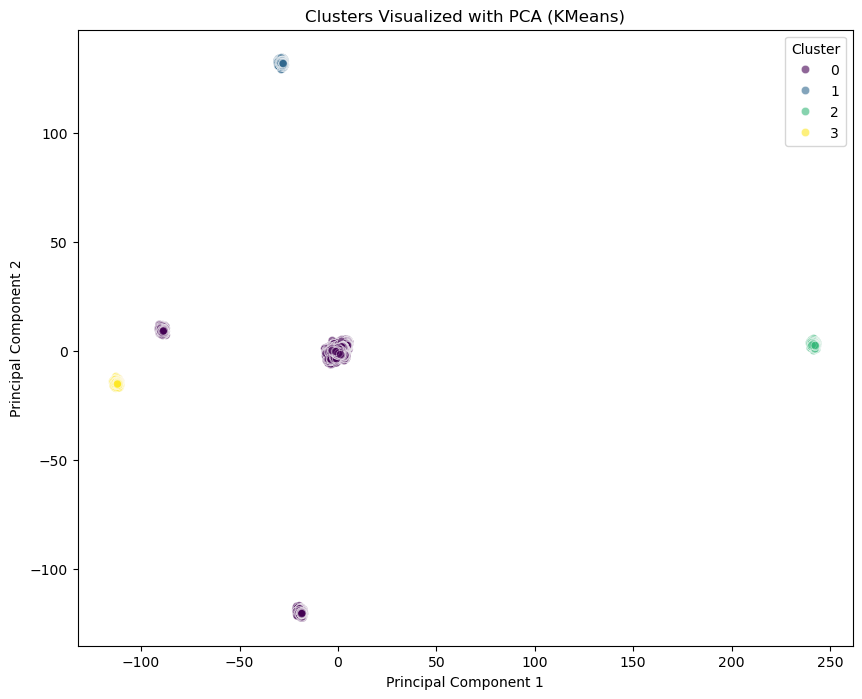

/var/folders/qf/dk7tzwpd1_j2430sljmhw_c40000gq/T/ipykernel_72909/371745840.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


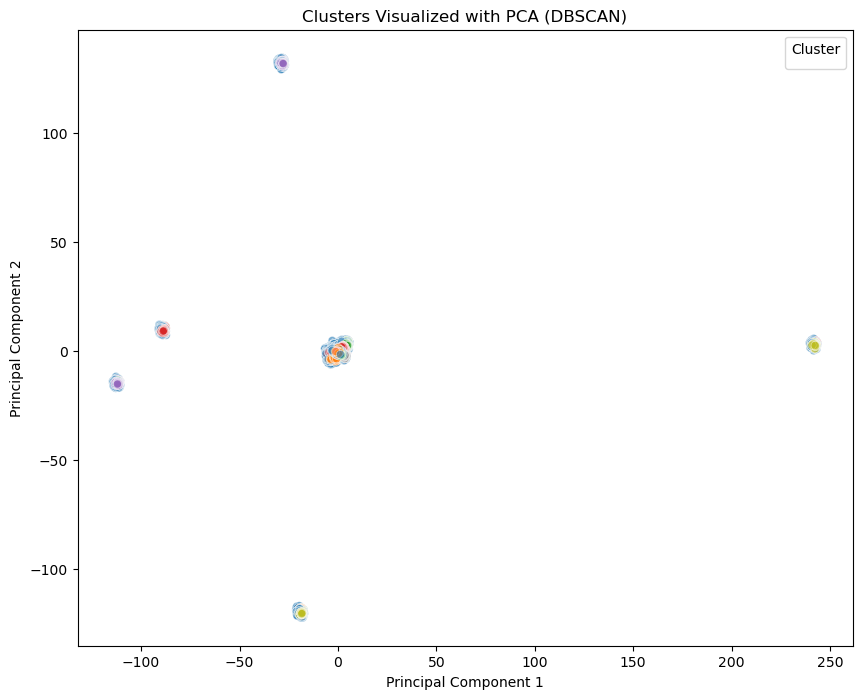

In [42]:
#======================================
# PCA VISUALIZATION FOR BOTH CLUSTERS
#======================================
features = X_scaled.drop(columns=['cluster_Kmeans', 'cluster_DBSCAN'])
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# KMeans PCA Visualization
pca_df['Cluster'] = X_scaled['cluster_Kmeans']
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.6)
plt.title('Clusters Visualized with PCA (KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# DBSCAN PCA Visualization
pca_df['Cluster'] = X_scaled['cluster_DBSCAN']
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='tab10', data=pca_df, alpha=0.6, legend = False)
plt.title('Clusters Visualized with PCA (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Plotting the state distributions on a map

you need to show which k is the most optimal => show stats? <br>
you need to add the hover with mouse => % of state in cluster + top features in cluster

(6331638, 17)
(1829363, 10)
   abv  appearance  taste    rating  style_Altbier  \
0 -0.5         0.0  -0.50 -0.313433            0.0   
1 -0.5        -1.0  -0.75 -1.014925            0.0   
2 -0.5        -2.0  -0.50 -0.955224            0.0   
3 -0.5         0.0   0.00  0.134328            0.0   
4 -0.5         0.0   0.50  0.731343            0.0   

   style_American Adjunct Lager  style_American Amber / Red Ale  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   style_American Amber / Red Lager  style_American Barleywine  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0           

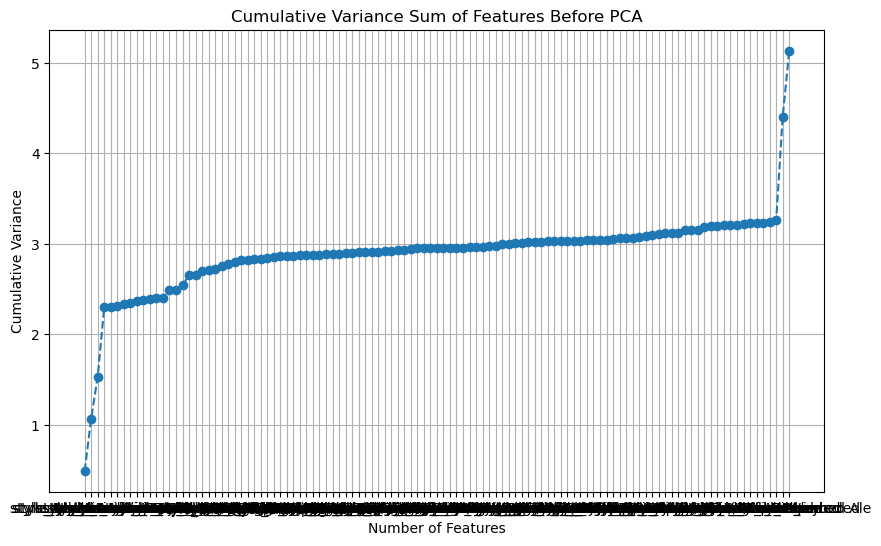

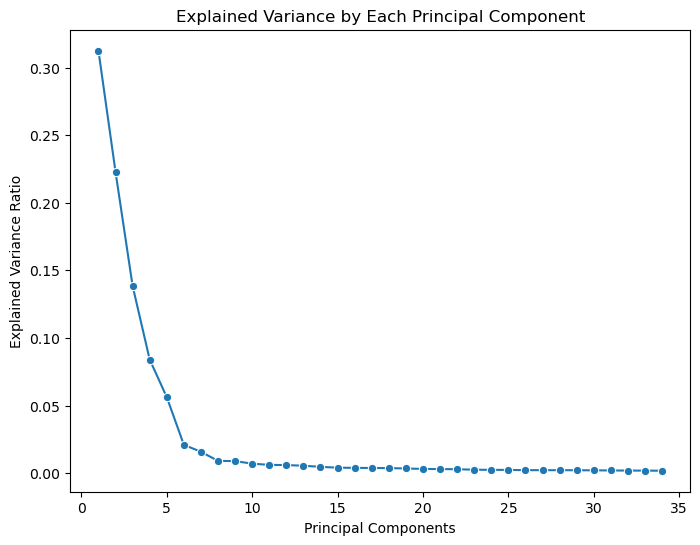

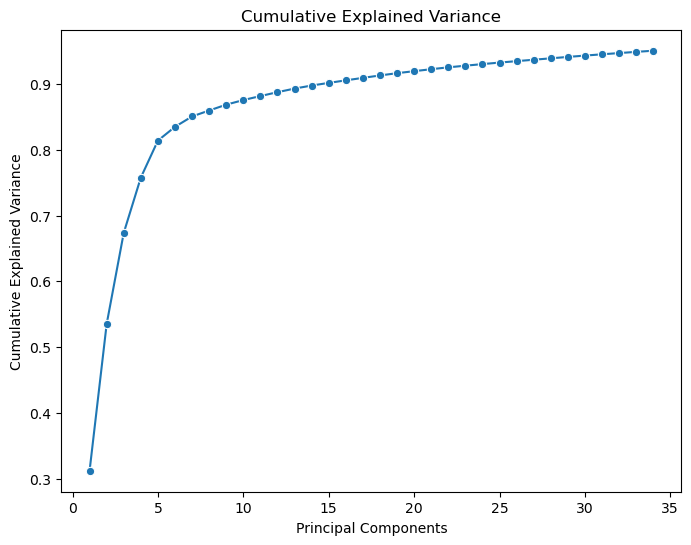

PCA transformed data saved as 'pca_transformed_data.csv'
Shape of the DataFrame: (1829363, 34)


In [3]:
%run param_selec.ipynb

In [4]:
X_pca_df
#iarantsoa -> ask what each feature is

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.403559,-0.423929,-0.928445,-0.332123,0.331993,-0.140588,-0.047128,-0.016731,-0.070423,-0.044114,...,-0.022585,-0.004032,0.004938,0.001855,0.024860,0.020456,0.005616,-0.009943,-0.019304,-0.008218
1,-1.935785,1.493646,-0.259902,-0.179736,-0.209203,-0.094416,-0.008755,-0.001414,-0.068713,-0.030748,...,-0.012127,-0.004456,-0.000711,0.001323,0.017636,0.013694,0.003237,-0.006557,-0.011955,-0.005809
2,-1.729522,-0.844689,-0.787277,-0.074176,-1.201227,-0.076966,-0.019152,-0.004332,-0.065209,-0.029637,...,-0.003189,-0.006623,-0.002276,0.001040,0.014830,0.007952,0.003647,-0.008031,-0.007477,0.001340
3,-0.139464,0.908600,-0.731709,-0.509938,0.004315,-0.145033,-0.046500,-0.020116,-0.074877,-0.045680,...,-0.022141,-0.003392,0.004453,0.003003,0.024846,0.018809,0.006160,-0.008714,-0.018987,-0.009549
4,0.821753,-0.397967,-1.192828,-0.626088,-0.381903,-0.160948,-0.069196,-0.030493,-0.076376,-0.052296,...,-0.022645,-0.003886,0.006133,0.003730,0.026927,0.018424,0.007755,-0.010378,-0.020193,-0.008027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829358,-1.360917,-0.872239,-0.731921,0.311644,0.196728,-0.166466,-0.126723,0.416442,0.823866,0.108940,...,0.012137,-0.002314,0.001554,-0.002939,-0.016321,-0.003852,-0.001112,0.004724,0.007418,0.005212
1829359,-0.421502,-0.501082,-0.978902,-0.415414,-0.461513,-0.137763,-0.048096,-0.020260,-0.083391,-0.047895,...,-0.019874,-0.004366,0.000905,0.002691,0.035939,0.024428,0.010777,-0.011739,-0.024801,-0.006748
1829360,-2.455030,-0.892905,-0.629669,0.073388,0.007916,-0.088066,-0.006766,0.008668,-0.071480,-0.031501,...,-0.018062,-0.007462,-0.001558,0.000448,0.030224,0.023920,0.005160,-0.014696,-0.023481,-0.006730
1829361,-4.140729,-1.428024,-0.362773,0.513999,0.978238,-0.066399,0.008360,0.006342,-0.068102,-0.023364,...,-0.003592,-0.001814,-0.007213,-0.004246,0.026810,0.024605,0.008970,-0.002274,-0.010903,0.003356


In [5]:
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px  
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
import plotly.io as pio
from shapely.geometry import Polygon, MultiPolygon
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np

pio.renderers.default = 'notebook'
us_map = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
us_map.rename(columns={'name': 'state'}, inplace=True)
us_map['state'] = us_map['state'].str.lower().str.strip()
us_map = us_map.to_crs(epsg=4326)  # Ensure correct coordinate system

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_pca_df), columns=X_pca_df.columns)

k_range = range(3, 11) 

top_states_k = []
top_features_k = {}

for k in k_range:
    X_scaled_copy = X_scaled.copy()

    X_scaled_copy.columns = X_scaled_copy.columns.astype(str)
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    cluster_labels_kmeans = kmeans.fit_predict(X_scaled_copy)
    X_scaled_copy['cluster_Kmeans'] = cluster_labels_kmeans
    
    cluster_labels_df = pd.DataFrame({'cluster_Kmeans': cluster_labels_kmeans})
    #cluster_labels_df = X_scaled_copy[['cluster_Kmeans']].reset_index(drop=True)
    cluster_labels_df['user_id'] = df.loc[X_pca_df.index, 'user_id'].values
    cluster_labels_df['beer_id'] = df.loc[X_pca_df.index, 'beer_id'].values

    cluster_labels_df = cluster_labels_df.merge(df[['user_id', 'user_state']].drop_duplicates(), on='user_id', how='left')
    if 'beer_id' in df.columns:
        cluster_labels_df = cluster_labels_df.merge(df[['beer_id', 'beer_state']].drop_duplicates(), on='beer_id', how='left')

    user_cluster_state_counts = cluster_labels_df.groupby(['cluster_Kmeans', 'user_state']).size().unstack(fill_value=0)
    user_cluster_state_counts_t = cluster_labels_df.groupby(['cluster_Kmeans', 'user_state']).size().unstack(fill_value=0).T
    state_totals = user_cluster_state_counts_t.sum(axis=1)
    normalized_cluster_data = user_cluster_state_counts_t.div(state_totals, axis=0)

    for cluster_label, cluster_data in normalized_cluster_data.items():
        top_states = cluster_data.nlargest(10).index
        print(f"Cluster {cluster_label}: {', '.join(top_states)}")
        top_states_k.append((k, cluster_label, list(top_states)))

    cluster_centers = kmeans.cluster_centers_
    feature_names = X_scaled_copy.columns

    top_features_per_cluster = {}
    for cluster_num in range(k):
        centroid = cluster_centers[cluster_num]
        top_n = 5  
        top_feature_indices = np.argsort(np.abs(centroid))[::-1][:top_n]
        top_feature_names = [feature_names[i] for i in top_feature_indices]
        top_features_per_cluster[cluster_num] = top_feature_names
        print(f"K={k} Cluster {cluster_num}: Top Features: {', '.join(top_feature_names)}")
    
    top_features_k[k] = top_features_per_cluster

#extract top features
#make plot

Cluster 0: Utah, Idaho, Hawaii, Oklahoma, Arizona, Rhode Island, Georgia, Pennsylvania, Washington, Missouri
Cluster 1: Nebraska, North Dakota, Minnesota, West Virginia, Iowa, Wisconsin, Wyoming, Alaska, Texas, Maine
Cluster 2: Arkansas, Georgia, Utah, Oklahoma, Mississippi, South Carolina, Oregon, Wyoming, Vermont, Tennessee
K=3 Cluster 0: Top Features: 27, 25, 29, 28, 24
K=3 Cluster 1: Top Features: 25, 5, 6, 29, 9
K=3 Cluster 2: Top Features: 27, 28, 29, 26, 30
Cluster 0: Nebraska, North Dakota, South Dakota, Minnesota, Wisconsin, Iowa, Wyoming, West Virginia, New Hampshire, Michigan
Cluster 1: Utah, Delaware, Maine, Pennsylvania, Virginia, Hawaii, Arizona, North Carolina, Idaho, New York
Cluster 2: Arkansas, Georgia, Utah, Oklahoma, Mississippi, South Carolina, Oregon, Wyoming, Vermont, Tennessee
Cluster 3: Louisiana, Idaho, Georgia, Washington, Oregon, Utah, Hawaii, Wisconsin, Mississippi, Colorado
K=4 Cluster 0: Top Features: 25, 27, 26, 5, 6
K=4 Cluster 1: Top Features: 25, 27, 

In [9]:
top_states_k

[(3,
  0,
  ['Utah',
   'Idaho',
   'Hawaii',
   'Oklahoma',
   'Arizona',
   'Rhode Island',
   'Georgia',
   'Pennsylvania',
   'Washington',
   'Missouri']),
 (3,
  1,
  ['Nebraska',
   'North Dakota',
   'Minnesota',
   'West Virginia',
   'Iowa',
   'Wisconsin',
   'Wyoming',
   'Alaska',
   'Texas',
   'Maine']),
 (3,
  2,
  ['Arkansas',
   'Georgia',
   'Utah',
   'Oklahoma',
   'Mississippi',
   'South Carolina',
   'Oregon',
   'Wyoming',
   'Vermont',
   'Tennessee']),
 (4,
  0,
  ['Nebraska',
   'North Dakota',
   'South Dakota',
   'Minnesota',
   'Wisconsin',
   'Iowa',
   'Wyoming',
   'West Virginia',
   'New Hampshire',
   'Michigan']),
 (4,
  1,
  ['Utah',
   'Delaware',
   'Maine',
   'Pennsylvania',
   'Virginia',
   'Hawaii',
   'Arizona',
   'North Carolina',
   'Idaho',
   'New York']),
 (4,
  2,
  ['Arkansas',
   'Georgia',
   'Utah',
   'Oklahoma',
   'Mississippi',
   'South Carolina',
   'Oregon',
   'Wyoming',
   'Vermont',
   'Tennessee']),
 (4,
  3,
  ['Lou

In [8]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import plotly.colors as pc

# ----------------------------
# Step 1: Restructure top_states_k
# ----------------------------

# Assuming `top_states_k` is your existing list of tuples
# Each tuple is of the form (k, cluster_label, list_of_states)

top_states_dict = {}
for k, cluster_label, states in top_states_k:
    if k not in top_states_dict:
        top_states_dict[k] = {}
    # Convert state names to lowercase for consistent matching
    top_states_dict[k][cluster_label] = [state.lower() for state in states]

# ----------------------------
# Step 2: Define the Color Palette
# ----------------------------

# Use Plotly's qualitative color palettes
color_palette = px.colors.qualitative.Plotly  # 10 distinct colors

# Determine the maximum number of clusters across all k
max_clusters = max(len(clusters) for clusters in top_states_dict.values())

# If more clusters are needed, extend the palette
if max_clusters > len(color_palette):
    additional_colors = px.colors.qualitative.Alphabet  # Additional distinct colors
    color_palette += additional_colors[:max_clusters - len(color_palette)]

# ----------------------------
# Step 3: Create Interactive Widgets
# ----------------------------

# Create an Output widget to hold the Plotly figure
output = widgets.Output()

# Create a slider for selecting k
k_slider = widgets.IntSlider(
    value=3,          # Starting value of k
    min=3,            # Minimum k value
    max=10,           # Maximum k value
    step=1,           # Step size
    description='k:',
    continuous_update=False  # Update only when slider is released
)

# ----------------------------
# Step 4: Define the Update Function
# ----------------------------

def update_map(k):
    with output:
        # Clear previous output
        output.clear_output(wait=True)
        
        # Retrieve the cluster-to-states mapping for the selected k
        cluster_to_states = top_states_dict.get(k, {})
        sorted_clusters = sorted(cluster_to_states.keys())
        
        # Assign colors to clusters
        color_discrete_map = {}
        for i, cluster in enumerate(sorted_clusters):
            color_discrete_map[f'Cluster {cluster}'] = color_palette[i % len(color_palette)]
        color_discrete_map['No Cluster'] = 'white'  # Color for states not in top 10
        
        # Assign 'No Cluster' to all states initially
        us_map['cluster'] = 'No Cluster'
        
        # Assign 'Cluster X' to top 10 states per cluster
        for cluster, states in cluster_to_states.items():
            us_map.loc[us_map['state'].isin(states), 'cluster'] = f'Cluster {cluster}'
        
        # Create 'state_cap' to match 'properties.name' in GeoJSON (Title Cased)
        us_map['state_cap'] = us_map['state'].str.title()
        
        # Add a 'name' column to match 'properties.name' in GeoJSON
        us_map['name'] = us_map['state_cap']
        
        # Create the choropleth map
        fig = px.choropleth(
            us_map,
            geojson=us_map.__geo_interface__,      # GeoJSON data
            locations='name',                           # Column with state names
            color='cluster',                            # Column to color by
            hover_name='name',                          # Hover text
            scope="usa",                                # Focus on USA
            color_discrete_map=color_discrete_map,       # Mapping of cluster to color
            featureidkey="properties.name"              # Key in GeoJSON to match
        )
        
        # Update geospatial layout for better visualization
        fig.update_geos(fitbounds="locations", visible=False)
        
        # Update overall layout for aesthetics
        fig.update_layout(
            margin={"r":0,"t":30,"l":0,"b":0},
            legend_title="Clusters",
            title_text=f"Top 10 States per Cluster for k={k}",
            title_x=0.5
        )
        
        # Display the figure
        fig.show()

# ----------------------------
# Step 5: Link the Slider to the Update Function
# ----------------------------

def on_k_change(change):
    if change['name'] == 'value':
        update_map(change['new'])

# Attach the callback to the slider
k_slider.observe(on_k_change, names='value')

# ----------------------------
# Step 6: Display the Widgets and Initial Map
# ----------------------------

# Display the slider and the Output widget
display(k_slider, output)

# Display the initial map with the starting value of k
update_map(k_slider.value)


IntSlider(value=3, continuous_update=False, description='k:', max=10, min=3)

Output()

In [70]:
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px  # Import plotly.express for color conversion
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
import plotly.io as pio
from shapely.geometry import Polygon, MultiPolygon
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np

# Set renderer for VSCode or JupyterLab environments
pio.renderers.default = 'notebook'  # Keeps output within VSCode (Jupyter extension)

# Load US states map
us_map = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
us_map.rename(columns={'name': 'state'}, inplace=True)
us_map['state'] = us_map['state'].str.lower().str.strip()
us_map = us_map.to_crs(epsg=4326)  # Ensure correct coordinate system

# Generate sample data with multiple observations per state (simulate user data)
np.random.seed(42)
state_list = us_map['state'].unique()
num_observations = 1000  # Total number of observations
data = pd.DataFrame({
    'state': np.random.choice(state_list, size=num_observations),
    'feature_0': np.random.rand(num_observations),
    'feature_1': np.random.rand(num_observations),
    'feature_2': np.random.rand(num_observations),
    'feature_3': np.random.rand(num_observations),
    'feature_4': np.random.rand(num_observations)
})

# Simulate X_pca_df and df (replace with your actual data)
X_pca_df = data.drop('state', axis=1)  # Example PCA-transformed features
df = data.copy()
df['user_id'] = np.arange(len(df))
df['beer_id'] = np.random.randint(1000, 2000, size=len(df))
df['user_state'] = df['state']
df['beer_state'] = np.random.choice(state_list, size=len(df))

# Scaling the features
scaler = RobustScaler()
X_scaled_base = pd.DataFrame(scaler.fit_transform(X_pca_df), columns=X_pca_df.columns)

def calculate_cluster_proportions(df, cluster_column, all_states):
    """
    Calculates the proportion of each state's assignments to clusters.

    Parameters:
    - df: DataFrame containing state and cluster assignments.
    - cluster_column: The column name indicating cluster assignments.
    - all_states: List or array of all state names to ensure completeness.

    Returns:
    - DataFrame with states as index and cluster proportions as columns.
    """
    cluster_state_counts = df.groupby([cluster_column, 'user_state']).size().reset_index(name='count')
    cluster_state_counts = cluster_state_counts.rename(columns={cluster_column: 'cluster'})

    # Pivot to have clusters as columns
    cluster_pivot = cluster_state_counts.pivot(index='user_state', columns='cluster', values='count').fillna(0)

    # Reindex to include all states, filling missing states with zeros
    cluster_pivot = cluster_pivot.reindex(all_states, fill_value=0)

    # Normalize to get proportions
    cluster_proportions = cluster_pivot.div(cluster_pivot.sum(axis=1), axis=0).fillna(0)

    return cluster_proportions

def get_top_n_states_per_cluster(proportions_df, n=10):
    """
    Identifies the top N states for each cluster based on the highest proportions.

    Parameters:
    - proportions_df: DataFrame with states as index and cluster proportions as columns.
    - n: Number of top states to select per cluster.

    Returns:
    - Dict mapping cluster labels to lists of top N states.
    """
    top_states = {}
    for cluster in proportions_df.columns:
        top_n = proportions_df[cluster].nlargest(n).index.tolist()
        top_states[cluster] = top_n
    return top_states

def get_state_color(state, cluster_label, top_states, cluster_colors, default_color='#d3d3d3'):
    """
    Determines the color of a state based on its cluster and whether it's in the top states.

    Parameters:
    - state: The state name.
    - cluster_label: The cluster label the state belongs to.
    - top_states: Dict mapping cluster labels to lists of top states.
    - cluster_colors: Dict mapping cluster labels to color hex strings.
    - default_color: Hex string for states not in top states.

    Returns:
    - Hex color string.
    """
    for cluster, states in top_states.items():
        if state in states:
            color = cluster_colors.get(cluster, default_color)
            return color
    return default_color  # Default grey

def plot_interactive_map_top_states(X_scaled_base, us_map, k_range, df, X_pca_df, top_n=10):
    """
    Creates an interactive Plotly map with a slider to adjust the number of clusters.
    Highlights the top N states per cluster with distinct colors.

    Parameters:
    - X_scaled_base: DataFrame containing scaled features.
    - us_map: GeoDataFrame containing US states geometries.
    - k_range: Range of k values (number of clusters) to iterate over.
    - df: Original DataFrame containing user and beer information.
    - X_pca_df: DataFrame containing PCA-transformed features.
    - top_n: Number of top states to highlight per cluster.
    """
    all_states = us_map['state'].unique()  # List of all states

    # Store cluster proportions results
    results = {}
    top_states_map = {}  # To store top states per cluster for each k
    cluster_colors_map = {}  # To store colors for each k

    # Define a color palette from Plotly's qualitative palette
    qualitative_colors = px.colors.qualitative.Plotly  # You can choose another palette if desired

    # Precompute cluster labels and top states for all k in k_range
    for k in k_range:
        # Perform KMeans clustering with current k
        kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
        clusters = kmeans.fit_predict(X_scaled_base)
        cluster_col = f'cluster_{k}'
        X_scaled_base[cluster_col] = clusters

        # Calculate proportions
        temp_df = X_scaled_base.copy()
        temp_df['user_state'] = df['user_state']  # Assuming 'user_state' corresponds to 'state' in us_map
        proportions = calculate_cluster_proportions(temp_df, cluster_col, all_states)
        results[k] = proportions

        # Identify top N states per cluster
        top_states = get_top_n_states_per_cluster(proportions, n=top_n)
        top_states_map[k] = top_states

        # Assign colors to clusters
        cluster_colors = {}
        for cluster in range(k):
            color = qualitative_colors[cluster % len(qualitative_colors)]
            cluster_colors[cluster] = color  # Store as hex string
        cluster_colors_map[k] = cluster_colors

    # Initialize with the smallest k
    initial_k = min(k_range)
    initial_proportions = results[initial_k]
    initial_top_states = top_states_map[initial_k]
    initial_colors = cluster_colors_map[initial_k]

    # Assign colors to states based on top states
    us_map_initial = us_map.copy()
    us_map_initial = us_map_initial.merge(initial_proportions, left_on='state', right_index=True, how='left')
    us_map_initial = us_map_initial.fillna(0)  # Fill NaNs with 0 proportions
    cluster_cols = list(initial_proportions.columns)
    top_states = initial_top_states
    cluster_colors = initial_colors

    us_map_initial['color'] = us_map_initial['state'].apply(
        lambda state: get_state_color(state, 
                                      initial_proportions.loc[state].idxmax() if initial_proportions.loc[state].sum() > 0 else -1,
                                      top_states, 
                                      cluster_colors)
    )

    # Debugging: Print some color values
    print("Initial state colors:")
    print(us_map_initial[['state', 'color']].head())

    # Create GeoJSON features with assigned colors
    features = []
    for _, row in us_map_initial.iterrows():
        if isinstance(row['geometry'], (Polygon, MultiPolygon)):
            feature = {
                "type": "Feature",
                "geometry": row['geometry'].__geo_interface__,
                "properties": {
                    "state": row['state'].title(),
                    "color": row['color']
                }
            }
            features.append(feature)

    # Create the Scattergeo traces
    fig = go.FigureWidget()

    for feature in features:
        geometry = feature['geometry']
        if geometry['type'] == 'Polygon':
            polygons = [geometry['coordinates']]
        elif geometry['type'] == 'MultiPolygon':
            polygons = geometry['coordinates']
        else:
            continue  # Skip if not a Polygon or MultiPolygon

        for polygon in polygons:
            lon, lat = zip(*polygon[0])  # Extract the outer boundary
            fig.add_trace(go.Scattergeo(
                lon=lon,
                lat=lat,
                mode='lines',
                fill='toself',
                fillcolor=feature['properties']['color'],
                line=dict(width=0.5, color='black'),
                hoverinfo='text',
                text=(
                    f"State: {feature['properties']['state']}<br>"
                    f"K={initial_k}<br>"
                    f"Top {top_n} Cluster"
                )
            ))

    fig.update_layout(
        title_text=f"KMeans Clustering Results (K={initial_k}) - Top {top_n} States per Cluster",
        geo=dict(
            scope='usa',
            projection=dict(type='albers usa'),
            showland=True,
            landcolor='lightgray',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="black",
        ),
    )

    # Display the figure once
    display(fig)

    # Create and display the slider
    slider = widgets.IntSlider(
        min=min(k_range),
        max=max(k_range),
        step=1,
        value=initial_k,
        description="K",
        continuous_update=False
    )
    display(slider)

    # Define the callback function to update the figure
    def on_value_change(change):
        if change['name'] == 'value' and change['type'] == 'change':
            k = change['new']
            proportions = results[k]
            top_states = top_states_map[k]
            cluster_colors = cluster_colors_map[k]

            # Assign colors to states based on top states
            us_map_updated = us_map.copy()
            us_map_updated = us_map_updated.merge(proportions, left_on='state', right_index=True, how='left')
            us_map_updated = us_map_updated.fillna(0)  # Fill NaNs with 0 proportions
            cluster_cols_new = list(proportions.columns)

            us_map_updated['color'] = us_map_updated['state'].apply(
                lambda state: get_state_color(state, 
                                              proportions.loc[state].idxmax() if proportions.loc[state].sum() > 0 else -1,
                                              top_states, 
                                              cluster_colors)
            )

            # Debugging: Print some updated color values
            print(f"Updated state colors for k={k}:")
            print(us_map_updated[['state', 'color']].head())

            # Create updated GeoJSON features
            updated_features = []
            for _, row in us_map_updated.iterrows():
                if isinstance(row['geometry'], (Polygon, MultiPolygon)):
                    feature = {
                        "type": "Feature",
                        "geometry": row['geometry'].__geo_interface__,
                        "properties": {
                            "state": row['state'].title(),
                            "color": row['color']
                        }
                    }
                    updated_features.append(feature)

            # Clear existing traces
            with fig.batch_update():
                fig.data = []  # Remove existing traces

                # Add updated Scattergeo traces
                for feature in updated_features:
                    geometry = feature['geometry']
                    if geometry['type'] == 'Polygon':
                        polygons = [geometry['coordinates']]
                    elif geometry['type'] == 'MultiPolygon':
                        polygons = geometry['coordinates']
                    else:
                        continue  # Skip if not a Polygon or MultiPolygon

                    for polygon in polygons:
                        lon, lat = zip(*polygon[0])  # Extract the outer boundary
                        fig.add_trace(go.Scattergeo(
                            lon=lon,
                            lat=lat,
                            mode='lines',
                            fill='toself',
                            fillcolor=feature['properties']['color'],
                            line=dict(width=0.5, color='black'),
                            hoverinfo='text',
                            text=(
                                f"State: {feature['properties']['state']}<br>"
                                f"K={k}<br>"
                                f"Top {top_n} Cluster"
                            )
                        ))

                # Update the title
                fig.update_layout(title_text=f"KMeans Clustering Results (K={k}) - Top {top_n} States per Cluster")

            # Additional processing for cluster_labels_df
            # Merge cluster labels with user and beer data
            cluster_col = f'cluster_{k}'
            cluster_labels_df = X_scaled_base[[cluster_col]].copy()
            cluster_labels_df = cluster_labels_df.rename(columns={cluster_col: 'cluster_Kmeans'})
            cluster_labels_df['user_id'] = df['user_id'].values
            cluster_labels_df['beer_id'] = df['beer_id'].values

            cluster_labels_df = cluster_labels_df.merge(df[['user_id', 'user_state']].drop_duplicates(), on='user_id', how='left')
            if 'beer_id' in df.columns:
                cluster_labels_df = cluster_labels_df.merge(df[['beer_id', 'beer_state']].drop_duplicates(), on='beer_id', how='left')

            # Calculate cluster proportions per user state
            user_cluster_state_counts_t = cluster_labels_df.groupby(['cluster_Kmeans', 'user_state']).size().unstack(fill_value=0).T
            state_totals = user_cluster_state_counts_t.sum(axis=1)
            normalized_cluster_data = user_cluster_state_counts_t.div(state_totals, axis=0).fillna(0)

            # Print top states per cluster
            print(f"\nK={k} - Top {top_n} States per Cluster:")
            for cluster_label, cluster_data in normalized_cluster_data.items():
                top_states_cluster = cluster_data.nlargest(top_n).index
                print(f"Cluster {cluster_label}: {', '.join(top_states_cluster)}")

    # Attach the callback to the slider
    slider.observe(on_value_change)

# Define the range of k values you want to explore
k_range = range(3, 11)  # For example, k from 3 to 10

# Execute the plotting function
plot_interactive_map_top_states(X_scaled_base, us_map, k_range, df, X_pca_df, top_n=10)


Initial state colors:
        state    color
0     alabama  #d3d3d3
1      alaska  #00CC96
2     arizona  #636EFA
3    arkansas  #d3d3d3
4  california  #d3d3d3


FigureWidget({
    'data': [{'fill': 'toself',
              'fillcolor': '#d3d3d3',
              'hoverinfo': 'text',
              'lat': [35.00118, 34.984749, 34.124869, 32.859696, 32.580372,
                      32.421541, 32.322956, 32.262709, 32.13674, 32.01077,
                      31.840985, 31.539753, 31.27686, 31.003013, 30.997536,
                      30.997536, 30.86609, 30.674397, 30.510088, 30.427934,
                      30.280057, 30.247195, 30.411504, 30.657966, 30.685351,
                      30.499135, 30.318396, 30.367688, 31.895754, 33.796253,
                      34.891641, 34.995703, 35.00118],
              'line': {'color': 'black', 'width': 0.5},
              'lon': [-87.359296, -85.606675, -85.431413, -85.184951, -85.069935,
                      -84.960397, -85.004212, -84.889196, -85.058981, -85.053504,
                      -85.141136, -85.042551, -85.113751, -85.004212, -85.497137,
                      -87.600282, -87.633143, -87.408589, -87.4469

IntSlider(value=3, continuous_update=False, description='K', max=10, min=3)

Updated state colors for k=4:
        state    color
0     alabama  #00CC96
1      alaska  #00CC96
2     arizona  #00CC96
3    arkansas  #d3d3d3
4  california  #00CC96

K=4 - Top 10 States per Cluster:
Cluster 0: new hampshire, delaware, vermont, puerto rico, california, maryland, south carolina, utah, north carolina, north dakota
Cluster 1: louisiana, pennsylvania, rhode island, iowa, georgia, colorado, illinois, montana, ohio, idaho
Cluster 2: new jersey, missouri, virginia, alaska, alabama, illinois, florida, arizona, colorado, connecticut
Cluster 3: district of columbia, nevada, kentucky, tennessee, texas, hawaii, wisconsin, oregon, wyoming, arizona
Updated state colors for k=5:
        state    color
0     alabama  #AB63FA
1      alaska  #AB63FA
2     arizona  #EF553B
3    arkansas  #FFA15A
4  california  #AB63FA

K=5 - Top 10 States per Cluster:
Cluster 0: louisiana, pennsylvania, rhode island, iowa, georgia, colorado, illinois, montana, ohio, idaho
Cluster 1: texas, nevada, dist

   id        name  density                                           geometry
0  01     Alabama   94.650  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona   57.050  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


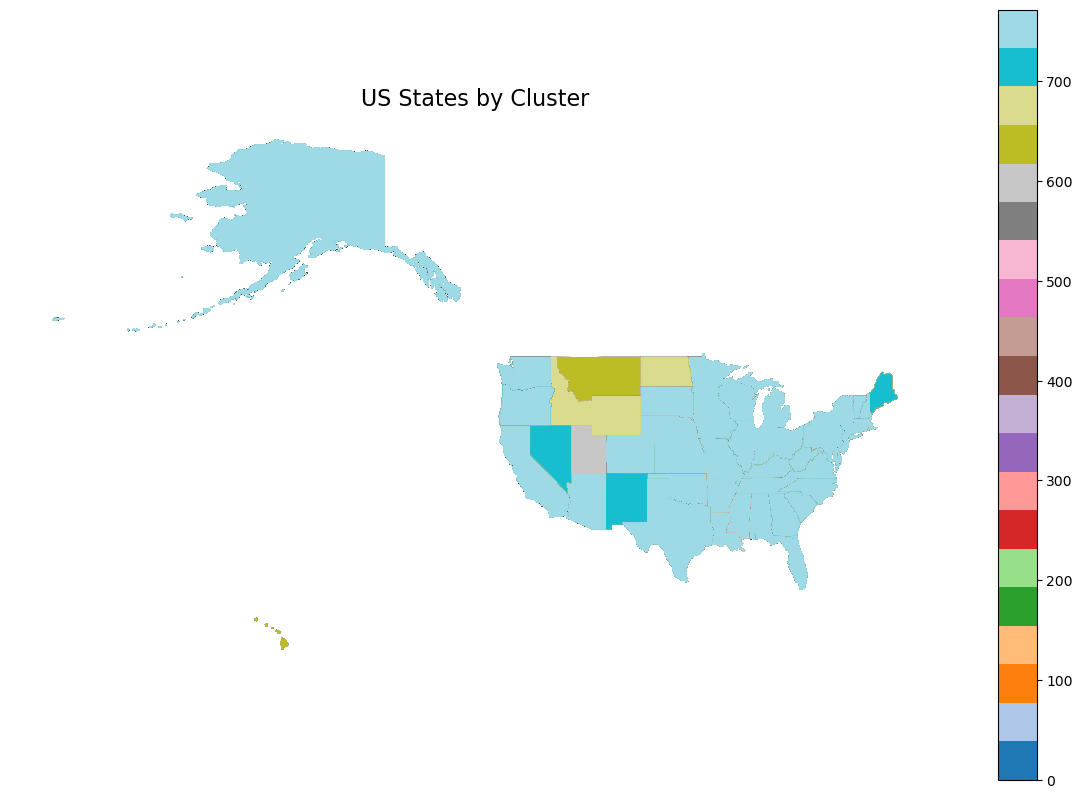

State names in us_map:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']

State names in state_cluster_df:
['Delaware' 'Montana' 'Oklahoma' 'South Dakota' 'Washington' 'Michigan'
 'Rhode Island' 'Wyoming' 'Arizona' 'California' 'New Mexico'
 'Massachusetts' 'New Hampshire' 'Alaska' 'New Jersey' 'Oregon'
 'Louisiana' 'Utah' 'Colorado' 'Vermont' 'Kentucky' 'Wisconsin' 'Illinois'
 'Iowa' 'Minnesota' 'Maine' 'Virginia' 'Pennsylvani

In [ ]:
us_map = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
print(us_map.head())
us_map.rename(columns={'name': 'state'}, inplace=True)


state_cluster_map = []  
cluster_list = []  

for cluster_label, cluster_data in normalized_cluster_data.items():
    top_states = cluster_data.nlargest(10).index.tolist()  
    cluster_list.append(top_states)

for cluster_id, states in enumerate(cluster_list):
    for state in states:
        state_cluster_map.append({'state': state, 'cluster': cluster_id})

state_cluster_df = pd.DataFrame(state_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', left_on='state', right_on='state')

ax = merged_map.plot(column='cluster', cmap='tab20', figsize=(15, 10), legend=True)
ax.set_title("US States by Cluster", fontsize=16)
ax.axis('off')
plt.show()

print("State names in us_map:")
print(us_map['state'].unique())

print("\nState names in state_cluster_df:")
print(state_cluster_df['state'].unique())


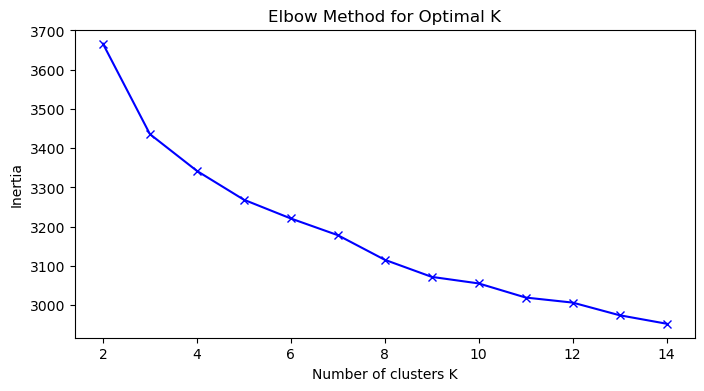

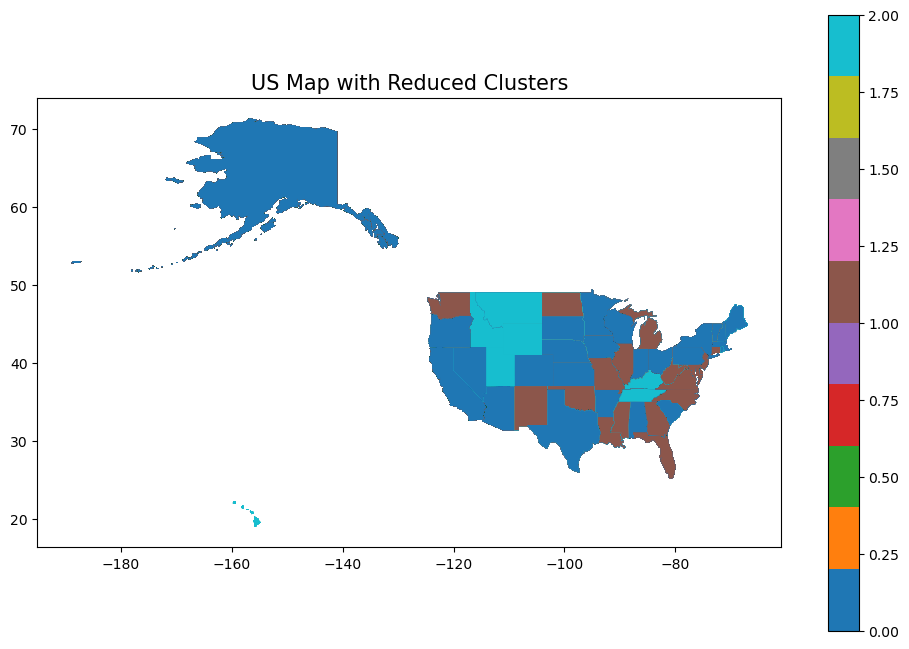

In [ ]:
unique_states = list({state for cluster in cluster_list for state in cluster})
cluster_matrix = []

for cluster in cluster_list:
    cluster_vector = [1 if state in cluster else 0 for state in unique_states]
    cluster_matrix.append(cluster_vector)

cluster_df = pd.DataFrame(cluster_matrix, columns=unique_states)

inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

reduced_kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust `n_clusters` as needed
cluster_df['reduced_cluster'] = reduced_kmeans.fit_predict(cluster_df)

reduced_cluster_map = dict(zip(range(len(cluster_list)), cluster_df['reduced_cluster']))

state_cluster_df['reduced_cluster'] = state_cluster_df['cluster'].map(reduced_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', on='state')

fig, ax = plt.subplots(figsize=(12, 8))
merged_map.plot(column='reduced_cluster', cmap='tab10', legend=True, ax=ax)
ax.set_title('US Map with Reduced Clusters', fontsize=15)
plt.show()


### From DBSCAN with eps = 1.5 (thomas ran)

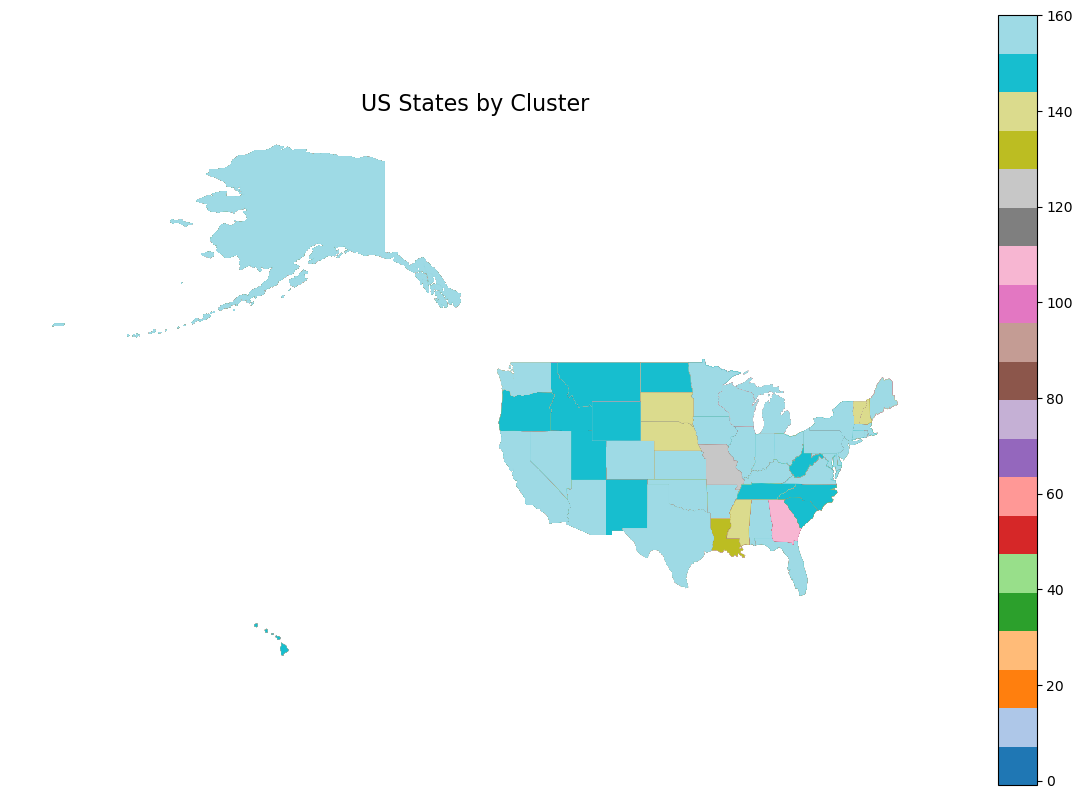

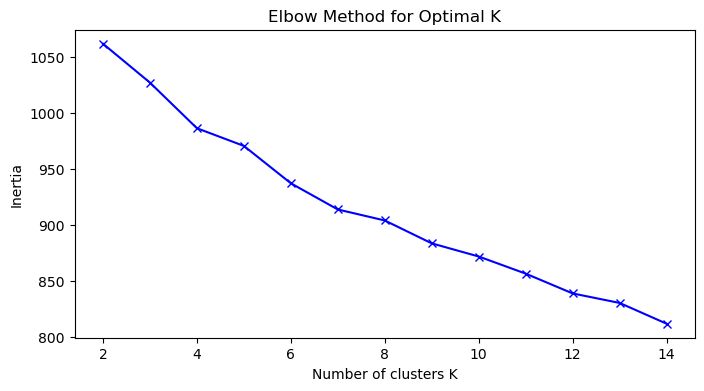

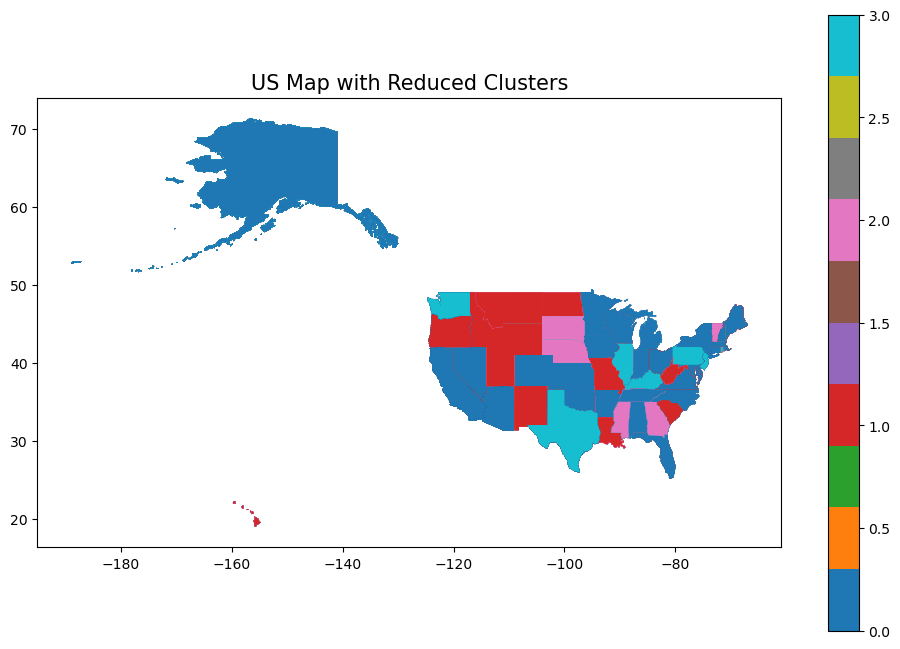

In [ ]:


us_map = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
us_map.rename(columns={'name': 'state'}, inplace=True)

cluster_data = {
    -1: ['North Dakota', 'Delaware', 'Nebraska', 'Mississippi', 'Arkansas', 'Hawaii', 'Rhode Island', 'Oregon', 'Alabama', 'Vermont'],
    0: ['New Mexico', 'Massachusetts', 'Montana', 'Washington', 'Rhode Island', 'New Hampshire', 'California', 'New Jersey', 'Alaska', 'Oregon'],
    1: ['Wyoming', 'Alaska', 'Louisiana', 'Oregon', 'Colorado', 'Vermont', 'Montana', 'Arizona', 'Utah', 'Pennsylvania'],
    2: ['Montana', 'Hawaii', 'Georgia', 'Colorado', 'Wyoming', 'West Virginia', 'California', 'South Carolina', 'Pennsylvania', 'Utah'],
    3: ['Wisconsin', 'Illinois', 'Montana', 'Iowa', 'Vermont', 'Minnesota', 'Wyoming', 'South Dakota', 'Utah', 'Missouri'],
    4: ['Utah', 'Delaware', 'Maine', 'Virginia', 'Hawaii', 'Pennsylvania', 'Arizona', 'North Carolina', 'Idaho', 'New York'],
    5: ['Hawaii', 'Maine', 'Utah', 'Massachusetts', 'Connecticut', 'Rhode Island', 'Alaska', 'Idaho', 'New Hampshire', 'New York'],
    6: ['Wisconsin', 'Minnesota', 'New Hampshire', 'South Dakota', 'West Virginia', 'Illinois', 'Montana', 'Connecticut', 'Rhode Island', 'Tennessee'],
    7: ['Wisconsin', 'Minnesota', 'Illinois', 'Iowa', 'Indiana', 'Alaska', 'South Dakota', 'Colorado', 'Missouri', 'Montana'],
    8: ['South Dakota', 'Minnesota', 'North Dakota', 'Iowa', 'Texas', 'Louisiana', 'Missouri', 'Tennessee', 'Indiana', 'New Jersey'],
    9: ['South Dakota', 'Wisconsin', 'Iowa', 'North Dakota', 'Nebraska', 'Minnesota', 'Michigan', 'Indiana', 'Illinois', 'Nevada'],
    10: ['South Dakota', 'Utah', 'Wisconsin', 'Minnesota', 'Iowa', 'Illinois', 'West Virginia', 'Nebraska', 'Indiana', 'Oklahoma'],
    11: ['Mississippi', 'Wisconsin', 'Alaska', 'Washington', 'Oregon', 'South Carolina', 'Georgia', 'Iowa', 'Tennessee', 'Florida'],
    12: ['Michigan', 'Nevada', 'Washington', 'West Virginia', 'North Carolina', 'Florida', 'Nebraska', 'Virginia', 'Maryland', 'Texas'],
    13: ['North Dakota', 'Washington', 'Maine', 'Wyoming', 'Idaho', 'Nevada', 'Rhode Island', 'New Hampshire', 'California', 'Alaska'],
    14: ['Mississippi', 'Maine', 'Kentucky', 'West Virginia', 'Tennessee', 'Florida', 'North Dakota', 'Michigan', 'Missouri', 'Iowa'],
    15: ['Arkansas', 'Montana', 'South Dakota', 'Mississippi', 'Utah', 'Louisiana', 'Kansas', 'West Virginia', 'Tennessee', 'North Dakota'],
    16: ['Washington', 'West Virginia', 'Alaska', 'Oregon', 'New Mexico', 'Nebraska', 'Georgia', 'Delaware', 'Montana', 'Florida'],
    17: ['Georgia', 'Alabama', 'South Carolina', 'Tennessee', 'North Carolina', 'Florida', 'Mississippi', 'Delaware', 'Nebraska', 'Idaho'],
    18: ['California', 'New Mexico', 'North Dakota', 'Nevada', 'Hawaii', 'Arizona', 'Idaho', 'Vermont', 'Alaska', 'North Carolina'],
    19: ['Washington', 'Louisiana', 'Idaho', 'West Virginia', 'Oregon', 'Vermont', 'Arizona', 'Montana', 'Tennessee', 'Kentucky'],
    20: ['Wisconsin', 'Utah', 'Kansas', 'California', 'Arkansas', 'New Mexico', 'Nevada', 'Wyoming', 'Iowa', 'North Dakota'],
    21: ['Rhode Island', 'Oklahoma', 'South Dakota', 'Massachusetts', 'Arizona', 'Utah', 'Ohio', 'North Dakota', 'Missouri', 'Virginia'],
    22: ['Wyoming', 'Hawaii', 'Georgia', 'Tennessee', 'Arizona', 'Wisconsin', 'Iowa', 'New Hampshire', 'Texas', 'West Virginia'],
    23: ['West Virginia', 'Georgia', 'Mississippi', 'South Dakota', 'Tennessee', 'North Dakota', 'Florida', 'Maryland', 'Washington', 'Alabama'],
    24: ['Massachusetts', 'New Mexico', 'Georgia', 'Maine', 'Rhode Island', 'Alabama', 'Nebraska', 'Nevada', 'Vermont', 'New Hampshire'],
    25: ['South Dakota', 'Massachusetts', 'Rhode Island', 'Washington', 'New Hampshire', 'Utah', 'Idaho', 'Vermont', 'Oregon', 'Maine'],
    26: ['Mississippi', 'Louisiana', 'Oklahoma', 'Kentucky', 'Kansas', 'Utah', 'Vermont', 'Wyoming', 'Alabama', 'Rhode Island'],
    27: ['Louisiana', 'Mississippi', 'Missouri', 'Indiana', 'Iowa', 'Ohio', 'Rhode Island', 'Alabama', 'Nebraska', 'South Dakota'],
    28: ['Louisiana', 'Mississippi', 'Arkansas', 'Montana', 'Oklahoma', 'North Dakota', 'Texas', 'South Dakota', 'Tennessee', 'Michigan'],
    29: ['Arkansas', 'Massachusetts', 'Connecticut', 'Maine', 'New Hampshire', 'Rhode Island', 'Utah', 'Nebraska', 'Vermont', 'Michigan'],
    30: ['Hawaii', 'Michigan', 'Missouri', 'Delaware', 'California', 'Wyoming', 'Arizona', 'Alabama', 'Nebraska', 'South Carolina'],
    31: ['West Virginia', 'Louisiana', 'Hawaii', 'Utah', 'Nebraska', 'Tennessee', 'Alabama', 'Kentucky', 'Indiana', 'Arkansas'],
    32: ['Vermont', 'Montana', 'Arkansas', 'Kentucky', 'Mississippi', 'Tennessee', 'New Hampshire', 'Utah', 'Missouri', 'Indiana'],
    33: ['Idaho', 'Hawaii', 'Nevada', 'West Virginia', 'Oregon', 'Missouri', 'Louisiana', 'North Carolina', 'Arkansas', 'Florida'],
    34: ['Hawaii', 'Wyoming', 'West Virginia', 'Louisiana', 'Arizona', 'Indiana', 'Nevada', 'Rhode Island', 'Wisconsin', 'Pennsylvania'],
    35: ['Alaska', 'Oklahoma', 'Arkansas', 'Nebraska', 'Iowa', 'Connecticut', 'Minnesota', 'Kansas', 'Missouri', 'Alabama'],
    36: ['Hawaii', 'Alaska', 'Rhode Island', 'Maine', 'New Mexico', 'Wyoming', 'Missouri', 'Arizona', 'Georgia', 'Oregon'],
    37: ['North Dakota', 'Wyoming', 'South Dakota', 'Oklahoma', 'Louisiana', 'Kansas', 'Iowa', 'Montana', 'Minnesota', 'California'],
    38: ['Delaware', 'West Virginia', 'Utah', 'Arkansas', 'Kentucky', 'Vermont', 'South Dakota', 'Montana', 'Connecticut', 'Idaho'],
    39: ['West Virginia', 'Louisiana', 'Alabama', 'Kentucky', 'Indiana', 'Minnesota', 'Delaware', 'Mississippi', 'Nebraska', 'New York'],
    40: ['Washington', 'Wisconsin', 'Louisiana', 'Wyoming', 'Hawaii', 'Utah', 'Virginia', 'Texas', 'Mississippi', 'New York'],
    41: ['Louisiana', 'Idaho', 'Georgia', 'Washington', 'Oregon', 'Hawaii', 'Utah', 'Wisconsin', 'Mississippi', 'Colorado'],
    42: ['North Dakota', 'Delaware', 'West Virginia', 'Wyoming', 'New Hampshire', 'Nevada', 'Arkansas', 'Kansas', 'Mississippi', 'Nebraska'],
    43: ['Nebraska', 'California', 'Connecticut', 'New York', 'Utah', 'Maine', 'Arizona', 'New Jersey', 'West Virginia', 'Hawaii'],
    44: ['West Virginia', 'Louisiana', 'Mississippi', 'Rhode Island', 'New Mexico', 'Maine', 'Missouri', 'North Dakota', 'Arizona', 'Oregon'],
    45: ['Utah', 'North Dakota', 'Wyoming', 'Louisiana', 'Mississippi', 'Rhode Island', 'South Dakota', 'Montana', 'Indiana', 'Tennessee'],
    46: ['Mississippi', 'South Dakota', 'Nebraska', 'New Mexico', 'West Virginia', 'Rhode Island', 'Oklahoma', 'New Hampshire', 'Indiana', 'Alabama'],
    47: ['South Dakota', 'West Virginia', 'Colorado', 'Hawaii', 'New Mexico', 'Minnesota', 'Connecticut', 'Kansas', 'Maryland', 'Virginia'],
    48: ['Louisiana', 'West Virginia', 'Nevada', 'Virginia', 'Wisconsin', 'Oregon', 'Indiana', 'Maryland', 'Texas', 'Missouri'],
    49: ['Rhode Island', 'Louisiana', 'Michigan', 'Massachusetts', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'],
    50: ['Maryland', 'Georgia', 'Minnesota', 'Florida', 'Wisconsin', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    51: ['Arkansas', 'West Virginia', 'Wyoming', 'Indiana', 'Michigan', 'Mississippi', 'Georgia', 'New Mexico', 'Louisiana', 'New York'],
    52: ['Idaho', 'Oklahoma', 'Wyoming', 'North Dakota', 'Delaware', 'Mississippi', 'Georgia', 'Texas', 'North Carolina', 'Maine'],
    53: ['Montana', 'Wyoming', 'Nevada', 'Arkansas', 'Iowa', 'Missouri', 'Alabama', 'Mississippi', 'New Mexico', 'Connecticut'],
    54: ['Wisconsin', 'Minnesota', 'Illinois', 'New York', 'Pennsylvania', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    55: ['Arkansas', 'Georgia', 'Utah', 'Oklahoma', 'Mississippi', 'South Carolina', 'Oregon', 'Wyoming', 'Tennessee', 'Vermont'],
    56: ['Oregon', 'Arkansas', 'Delaware', 'Kansas', 'Mississippi', 'West Virginia', 'Louisiana', 'Connecticut', 'Maine', 'Kentucky'],
    57: ['Arkansas', 'North Dakota', 'Delaware', 'Montana', 'Mississippi', 'Louisiana', 'Tennessee', 'Rhode Island', 'Alabama', 'Michigan'],
    58: ['Hawaii', 'Alaska', 'Vermont', 'Missouri', 'Iowa', 'Maine', 'New Hampshire', 'Wisconsin', 'New Jersey', 'Illinois'],
    59: ['Indiana', 'Virginia', 'New Jersey', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    60: ['Idaho', 'West Virginia', 'Nebraska', 'Delaware', 'Arkansas', 'Alaska', 'Maine', 'South Carolina', 'Louisiana', 'Ohio'],
    61: ['North Dakota', 'Montana', 'Iowa', 'Alaska', 'Indiana', 'Oklahoma', 'Maine', 'Nevada', 'Idaho', 'Arkansas'],
    62: ['West Virginia', 'Delaware', 'Iowa', 'South Carolina', 'Tennessee', 'Oregon', 'Colorado', 'New Mexico', 'Connecticut', 'Louisiana'],
    63: ['West Virginia', 'Alabama', 'Nevada', 'Idaho', 'Arkansas', 'Delaware', 'New Jersey', 'Mississippi', 'New York', 'Tennessee'],
    64: ['Utah', 'Montana', 'Louisiana', 'Oklahoma', 'Iowa', 'Virginia', 'Maine', 'Ohio', 'Pennsylvania', 'Kansas'],
    65: ['Utah', 'Illinois', 'Iowa', 'Delaware', 'Indiana', 'Michigan', 'Wyoming', 'Minnesota', 'Nebraska', 'Wisconsin'],
    66: ['West Virginia', 'Arkansas', 'Kansas', 'Oklahoma', 'Indiana', 'New Hampshire', 'Nevada', 'Virginia', 'Minnesota', 'Oregon'],
    67: ['Montana', 'Nevada', 'Michigan', 'Delaware', 'Kansas', 'Maryland', 'Mississippi', 'Colorado', 'West Virginia', 'Indiana'],
    68: ['New Mexico', 'Louisiana', 'Maryland', 'Maine', 'Minnesota', 'Rhode Island', 'Wisconsin', 'New Jersey', 'Connecticut', 'Kentucky'],
    69: ['South Dakota', 'West Virginia', 'Oklahoma', 'Kentucky', 'Georgia', 'Rhode Island', 'Kansas', 'Florida', 'Alabama', 'Pennsylvania'],
    70: ['North Carolina', 'Maine', 'Idaho', 'Tennessee', 'West Virginia', 'Wisconsin', 'Oklahoma', 'Vermont', 'Connecticut', 'Minnesota'],
    71: ['Hawaii', 'Mississippi', 'Wyoming', 'Rhode Island', 'Oklahoma', 'Kansas', 'Arizona', 'Maine', 'Nevada', 'Idaho'],
    72: ['Kansas', 'Louisiana', 'Missouri', 'Georgia', 'North Carolina', 'Illinois', 'Massachusetts', 'Alabama', 'Alaska', 'Arizona'],
    73: ['Utah', 'Montana', 'Nevada', 'West Virginia', 'Mississippi', 'Indiana', 'North Carolina', 'Oklahoma', 'Wisconsin', 'New Hampshire'],
    74: ['Montana', 'Louisiana', 'North Dakota', 'New Hampshire', 'Vermont', 'Michigan', 'Missouri', 'West Virginia', 'Hawaii', 'Alabama'],
    75: ['Utah', 'Rhode Island', 'South Dakota', 'Oklahoma', 'Arkansas', 'Kentucky', 'Oregon', 'Wisconsin', 'Minnesota', 'Connecticut'],
    76: ['Oregon', 'Illinois', 'Virginia', 'Wisconsin', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'],
    77: ['Hawaii', 'Alaska', 'Missouri', 'Mississippi', 'New Mexico', 'Kentucky', 'Louisiana', 'Maryland', 'Oklahoma', 'Tennessee'],
    78: ['Utah', 'Alaska', 'Oklahoma', 'Alabama', 'Idaho', 'Tennessee', 'Michigan', 'Delaware', 'New Mexico', 'Ohio'],
    79: ['South Carolina', 'North Carolina', 'Virginia', 'Florida', 'Washington', 'Massachusetts', 'New York', 'Alabama', 'Alaska', 'Arizona'],
    80: ['Utah', 'Delaware', 'Rhode Island', 'Alabama', 'West Virginia', 'Colorado', 'Vermont', 'New Hampshire', 'Pennsylvania', 'Nevada'],
    81: ['Iowa', 'Kentucky', 'Arizona', 'Florida', 'New York', 'Colorado', 'Washington', 'Michigan', 'Alabama', 'Alaska'],
    82: ['Kansas', 'Massachusetts', 'Washington', 'Michigan', 'Virginia', 'Minnesota', 'Ohio', 'Pennsylvania', 'Texas', 'Illinois'],
    83: ['South Carolina', 'Oregon', 'Massachusetts', 'New York', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    84: ['Alabama', 'Georgia', 'Arizona', 'North Carolina', 'New Jersey', 'Pennsylvania', 'Alaska', 'Arkansas', 'California', 'Colorado'],
    85: ['Georgia', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Florida'],
    86: ['Georgia', 'South Carolina', 'Mississippi', 'Alabama', 'Tennessee', 'Kentucky', 'Florida', 'Utah', 'Nebraska', 'Virginia'],
    87: ['Georgia', 'Maryland', 'Florida', 'Alabama', 'South Dakota', 'Pennsylvania', 'North Carolina', 'Virginia', 'Mississippi', 'New Mexico'],
    88: ['South Carolina', 'Kansas', 'Virginia', 'Texas', 'Michigan', 'Georgia', 'Colorado', 'Florida', 'Ohio', 'Wisconsin'],
    89: ['Vermont', 'Florida', 'Texas', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    90: ['Arkansas', 'North Carolina', 'Michigan', 'Minnesota', 'New York', 'Alabama', 'Alaska', 'Arizona', 'California', 'Colorado'],
    91: ['Kansas', 'Tennessee', 'Oregon', 'Minnesota', 'New Jersey', 'Ohio', 'Wisconsin', 'Washington', 'Pennsylvania', 'Alabama'],
    92: ['Kentucky', 'North Carolina', 'Georgia', 'Ohio', 'Wisconsin', 'Texas', 'New York', 'Pennsylvania', 'California', 'Alabama'],
    93: ['Alabama', 'Nevada', 'Michigan', 'Kansas', 'Massachusetts', 'Virginia', 'Kentucky', 'Florida', 'Ohio', 'Missouri'],
    94: ['Alabama', 'Georgia', 'South Carolina', 'Tennessee', 'North Carolina', 'Kentucky', 'Florida', 'Wyoming', 'Mississippi', 'Louisiana'],
    95: ['Mississippi', 'Florida', 'Ohio', 'Texas', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    96: ['Virginia', 'Texas', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware'],
    97: ['Arizona', 'Georgia', 'Massachusetts', 'Alabama', 'Alaska', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware'],
    98: ['Hawaii', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    99: ['Maryland', 'Ohio', 'California', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    100: ['West Virginia', 'Virginia', 'Massachusetts', 'Illinois', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    101: ['Rhode Island', 'Louisiana', 'Iowa', 'Georgia', 'Indiana', 'Virginia', 'Minnesota', 'Illinois', 'New York', 'Pennsylvania'],
    102: ['Oklahoma', 'Maine', 'Kansas', 'Alabama', 'New Hampshire', 'Kentucky', 'Oregon', 'Georgia', 'Virginia', 'Florida'],
    103: ['Alaska', 'Montana', 'Vermont', 'Maryland', 'Maine', 'New Hampshire', 'Iowa', 'Nevada', 'Idaho', 'Arkansas'],
    104: ['California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia'],
    105: ['New Jersey', 'Minnesota', 'New York', 'Illinois', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    106: ['Wyoming', 'Alabama', 'New Hampshire', 'Indiana', 'Michigan', 'Virginia', 'Minnesota', 'New Jersey', 'Ohio', 'Massachusetts'],
    107: ['Delaware', 'Rhode Island', 'Pennsylvania', 'Oklahoma', 'Kansas', 'Michigan', 'Ohio', 'Massachusetts', 'North Carolina', 'Nevada'],
    108: ['Illinois', 'Massachusetts', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    109: ['Ohio', 'Maryland', 'Texas', 'Massachusetts', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    110: ['Louisiana', 'Iowa', 'Texas', 'Missouri', 'Minnesota', 'Oregon', 'Indiana', 'Connecticut', 'Maryland', 'Georgia'],
    111: ['Maine', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    112: ['Kansas', 'Missouri', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    113: ['Connecticut', 'Colorado', 'Michigan', 'Virginia', 'Illinois', 'Texas', 'Massachusetts', 'New York', 'California', 'Alabama'],
    114: ['Vermont', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    115: ['Hawaii', 'Kentucky', 'Connecticut', 'Michigan', 'Texas', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    116: ['Alaska', 'New Hampshire', 'Iowa', 'Minnesota', 'Nebraska', 'Missouri', 'Connecticut', 'New Jersey', 'Michigan', 'South Carolina'],
    117: ['Maryland', 'Colorado', 'Pennsylvania', 'Virginia', 'Minnesota', 'Washington', 'Illinois', 'California', 'Alabama', 'Alaska'],
    118: ['Iowa', 'Delaware', 'New Hampshire', 'Colorado', 'Alaska', 'Oregon', 'Rhode Island', 'California', 'Arizona', 'Oklahoma'],
    119: ['Virginia', 'Oregon', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    120: ['Oklahoma', 'Tennessee', 'Iowa', 'Arizona', 'Missouri', 'Ohio', 'Wisconsin', 'Colorado', 'Texas', 'California'],
    121: ['Colorado', 'California', 'Oregon', 'Delaware', 'Pennsylvania', 'Nevada', 'New Jersey', 'Wyoming', 'Kansas', 'Maryland'],
    122: ['Maine', 'Delaware', 'Colorado', 'Pennsylvania', 'California', 'Utah', 'Oregon', 'Texas', 'North Dakota', 'Nevada'],
    123: ['Wyoming', 'Idaho', 'Alaska', 'Delaware', 'Vermont', 'Missouri', 'Arizona', 'Colorado', 'California', 'Indiana'],
    124: ['Utah', 'Nebraska', 'Oklahoma', 'Vermont', 'Louisiana', 'Pennsylvania', 'Connecticut', 'Michigan', 'Illinois', 'Virginia'],
    125: ['West Virginia', 'Arizona', 'Oregon', 'Colorado', 'Wisconsin', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arkansas'],
    126: ['Oklahoma', 'Oregon', 'Florida', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    127: ['Ohio', 'Wisconsin', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    128: ['Nevada', 'Texas', 'Massachusetts', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    129: ['Tennessee', 'North Carolina', 'Ohio', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    130: ['Maine', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    131: ['Mississippi', 'South Carolina', 'Maryland', 'Ohio', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    132: ['Maryland', 'Virginia', 'New Jersey', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    133: ['West Virginia', 'Oklahoma', 'Louisiana', 'Colorado', 'South Carolina', 'New Hampshire', 'Arizona', 'Massachusetts', 'Ohio', 'Connecticut'],
    134: ['Oklahoma', 'Kansas', 'Oregon', 'North Carolina', 'Washington', 'Massachusetts', 'California', 'Alabama', 'Alaska', 'Arizona'],
    135: ['Nevada', 'Iowa', 'New Hampshire', 'Kentucky', 'Maryland', 'New York', 'Florida', 'New Jersey', 'Alabama', 'Alaska'],
    136: ['Oklahoma', 'North Dakota', 'New Mexico', 'Montana', 'Michigan', 'Indiana', 'Vermont', 'Nebraska', 'Tennessee', 'Kentucky'],
    137: ['Nevada', 'New Hampshire', 'Virginia', 'Minnesota', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    138: ['Oklahoma', 'South Dakota', 'Montana', 'Alabama', 'Hawaii', 'Indiana', 'West Virginia', 'Utah', 'Vermont', 'Florida'],
    139: ['Montana', 'Utah', 'South Dakota', 'Indiana', 'Mississippi', 'Nebraska', 'Vermont', 'Arkansas', 'Tennessee', 'Rhode Island'],
    140: ['Washington', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    141: ['Ohio', 'Pennsylvania', 'Washington', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    142: ['Connecticut', 'Virginia', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Delaware'],
    143: ['Indiana', 'Colorado', 'Minnesota', 'Florida', 'New Jersey', 'Massachusetts', 'California', 'Alabama', 'Alaska', 'Arizona'],
    144: ['Delaware', 'South Carolina', 'Minnesota', 'New York', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    145: ['Tennessee', 'Pennsylvania', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    146: ['Utah', 'Virginia', 'Wyoming', 'New Mexico', 'Colorado', 'Maryland', 'Delaware', 'Iowa', 'Florida', 'Ohio'],
    147: ['Montana', 'Arizona', 'Massachusetts', 'Ohio', 'Florida', 'Pennsylvania', 'Colorado', 'New York', 'Virginia', 'Maryland'],
    148: ['Colorado', 'South Carolina', 'Alaska', 'Pennsylvania', 'Idaho', 'New York', 'North Dakota', 'Oregon', 'Massachusetts', 'California'],
    149: ['California', 'Nevada', 'Arizona', 'Hawaii', 'New Mexico', 'West Virginia', 'Montana', 'Oklahoma', 'Texas', 'Utah'],
    150: ['Iowa', 'North Carolina', 'Minnesota', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut'],
    151: ['Rhode Island', 'Kentucky', 'New Jersey', 'Indiana', 'New York', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    152: ['Maine', 'Kentucky', 'Minnesota', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    153: ['Rhode Island', 'Florida', 'Wisconsin', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    154: ['Florida', 'Ohio', 'Washington', 'New York', 'California', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    155: ['Alaska', 'Oklahoma', 'Arizona', 'Washington', 'Michigan', 'Massachusetts', 'New York', 'California', 'Alabama', 'Arkansas'],
    156: ['Kansas', 'Virginia', 'Texas', 'Pennsylvania', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'],
    157: ['Nevada', 'Indiana', 'New York', 'Pennsylvania', 'Washington', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona'],
    158: ['Alabama', 'Iowa', 'Maryland', 'Michigan', 'New Jersey', 'Pennsylvania', 'New York', 'Alaska', 'Arizona', 'Arkansas'],
    159: ['Rhode Island', 'Kentucky', 'New Jersey', 'Michigan', 'Illinois', 'Washington', 'Texas', 'Pennsylvania', 'Alabama', 'Alaska'],
    160: ['Iowa', 'Michigan', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
}

state_cluster_map = []
for cluster_id, states in cluster_data.items():
    for state in states:
        state_cluster_map.append({'state': state, 'cluster': cluster_id})

state_cluster_df = pd.DataFrame(state_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', left_on='state', right_on='state')

fig, ax = plt.subplots(figsize=(15, 10))
merged_map.plot(column='cluster', cmap='tab20', legend=True, ax=ax)
ax.set_title("US States by Cluster", fontsize=16)
ax.axis('off')
plt.show()

unique_states = list({state for states in cluster_data.values() for state in states})
cluster_matrix = []

for cluster_id, states in cluster_data.items():
    cluster_vector = [1 if state in states else 0 for state in unique_states]
    cluster_matrix.append(cluster_vector)

cluster_df = pd.DataFrame(cluster_matrix, columns=unique_states)

inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

reduced_kmeans = KMeans(n_clusters=4, random_state=42)  
cluster_df['reduced_cluster'] = reduced_kmeans.fit_predict(cluster_df)

reduced_cluster_map = dict(zip(cluster_data.keys(), cluster_df['reduced_cluster']))
state_cluster_df['reduced_cluster'] = state_cluster_df['cluster'].map(reduced_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', on='state')

fig, ax = plt.subplots(figsize=(12, 8))
merged_map.plot(column='reduced_cluster', cmap='tab10', legend=True, ax=ax)
ax.set_title('US Map with Reduced Clusters', fontsize=15)
plt.show()